In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_ind=k_indices[k]
    train_ind=k_indices[[i for i in range(k_indices.shape[0]) if i!=k]]
    train_ind=train_ind.reshape(-1)
    y_train=y[train_ind]
    y_test=y[test_ind]
    x_train=x[train_ind]
    x_test=x[test_ind]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    tx_train=build_poly(x_train,degree)
    tx_test=build_poly(x_test,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w,_=ridge_regression(y_train,tx_train,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr=np.sqrt(2*compute_mse(y_train,tx_train,w))
    loss_te=np.sqrt(2*compute_mse(y_test,tx_test,w))
    return loss_tr, loss_te

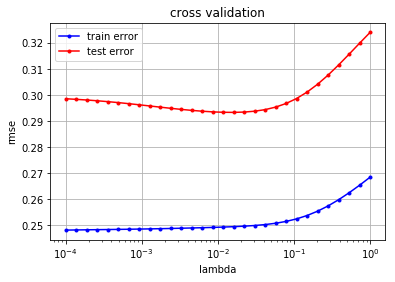

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    temp_tr=[]
    temp_te=[]
    for lambda_ in lambdas:
        for k in range(k_fold):
            tr,te=cross_validation(y,x,k_indices,k,lambda_,degree)
            temp_tr.append(tr)
            temp_te.append(te)
        rmse_tr.append(np.mean(temp_tr))
        rmse_te.append(np.mean(temp_te))
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

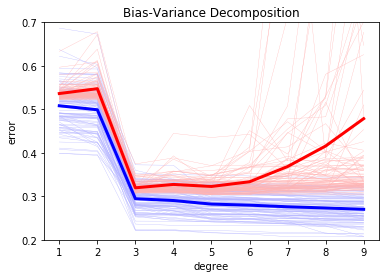

In [22]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        xtrain,ytrain,xtest,ytest=split_data(x,y,ratio_train,seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree,degree in enumerate(degrees):
            tx_train=build_poly(xtrain,degree)
            tx_test=build_poly(xtest,degree)
            w,_=least_squares(ytrain,tx_train)
            rmse_tr[index_seed,index_degree]=np.sqrt(2*compute_mse(ytrain,tx_train,w))
            rmse_te[index_seed,index_degree]=np.sqrt(2*compute_mse(ytest,tx_test,w))
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()